# Clustering: Finding Patterns in Unlabeled Data

## Learning Objectives
- Understand what clustering is and when to use it
- Learn to build a clustering model (K-Means)
- Evaluate clustering performance using metrics
- Visualize clusters and interpret results

## What is Clustering?
Clustering is an **unsupervised learning** technique used to group similar data points together. Unlike regression and classification (which are supervised and need labeled data), clustering finds patterns in data without any labels or target variables.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## Step 1: Load and Explore the Data

We'll use a customer dataset to group customers into segments based on their annual income and spending score. This is a classic use case for clustering!


In [4]:
# Load the dataset
df = pd.read_csv('customer_data.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())


First 5 rows of the dataset:
   annual_income  spending_score  age
0             75              71   28
1             72              26   48
2             19              36   53
3             26              73   41
4             22              28   51

Dataset shape: (1200, 3)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   annual_income   1200 non-null   int64
 1   spending_score  1200 non-null   int64
 2   age             1200 non-null   int64
dtypes: int64(3)
memory usage: 28.3 KB
None

Basic statistics:
       annual_income  spending_score          age
count    1200.000000     1200.000000  1200.000000
mean       49.925833       51.459167    40.690833
std        25.348651       24.242072    11.174046
min        15.000000        1.000000    18.000000
25%        25.000000       30.000000    33.000000
50%        50.0000

## Step 2: Data Visualization

Let's visualize the data to see if we can spot any natural groupings.


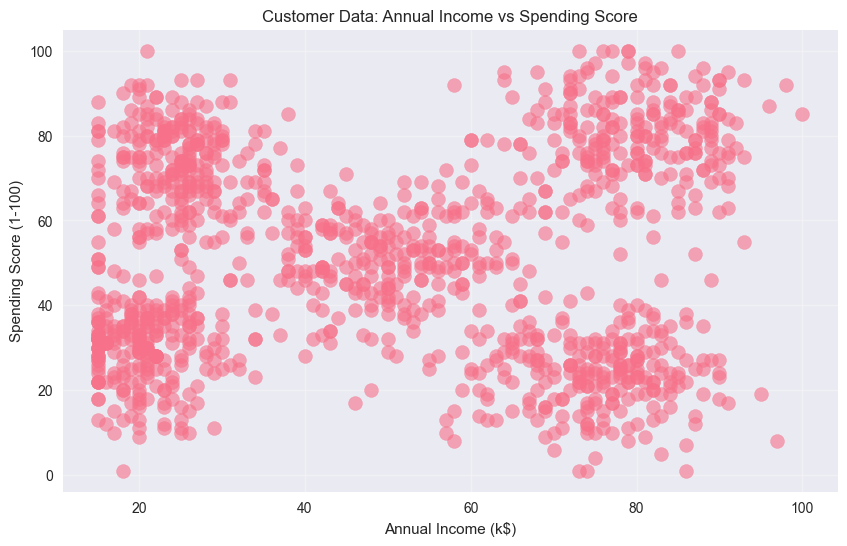

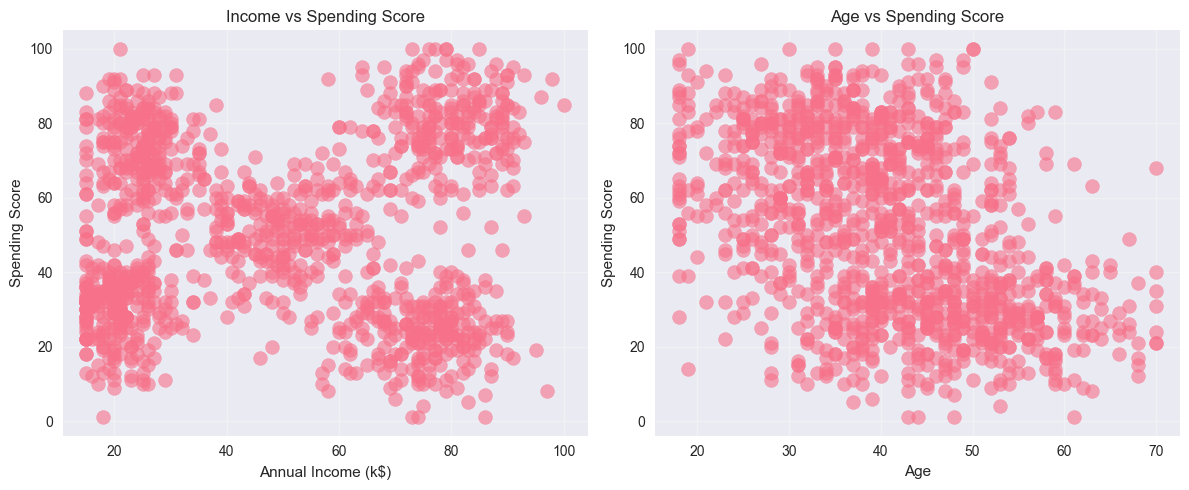

In [5]:
# Create scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(df['annual_income'], df['spending_score'], alpha=0.6, s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Data: Annual Income vs Spending Score')
plt.grid(True, alpha=0.3)
plt.show()

# Also create a 3D plot if we want to include age
fig = plt.figure(figsize=(12, 5))

# 2D view: Income vs Spending
ax1 = fig.add_subplot(121)
ax1.scatter(df['annual_income'], df['spending_score'], alpha=0.6, s=100)
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score')
ax1.set_title('Income vs Spending Score')
ax1.grid(True, alpha=0.3)

# 2D view: Age vs Spending
ax2 = fig.add_subplot(122)
ax2.scatter(df['age'], df['spending_score'], alpha=0.6, s=100)
ax2.set_xlabel('Age')
ax2.set_ylabel('Spending Score')
ax2.set_title('Age vs Spending Score')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 3: Prepare Data for Clustering

We need to select features and scale them. Scaling is important because features with different scales can bias the clustering algorithm.


In [6]:
# Select features for clustering
# We'll use annual_income and spending_score for 2D visualization
X = df[['annual_income', 'spending_score']].values

# Scale the features (important for clustering!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original data shape:", X.shape)
print("\nFirst 5 rows (original):")
print(X[:5])
print("\nFirst 5 rows (scaled):")
print(X_scaled[:5])
print("\nScaled data statistics:")
print(f"Mean: {X_scaled.mean(axis=0)}")
print(f"Std: {X_scaled.std(axis=0)}")


Original data shape: (1200, 2)

First 5 rows (original):
[[75 71]
 [72 26]
 [19 36]
 [26 73]
 [22 28]]

First 5 rows (scaled):
[[ 0.98958404  0.80640715]
 [ 0.8711852  -1.05064374]
 [-1.22052754 -0.63796576]
 [-0.94426359  0.88894275]
 [-1.10212871 -0.96810814]]

Scaled data statistics:
Mean: [-1.42108547e-16 -6.66133815e-17]
Std: [1. 1.]


## Step 4: Finding the Optimal Number of Clusters

Before clustering, we need to decide how many clusters (k) to create. We'll use the **Elbow Method** to find the optimal k.


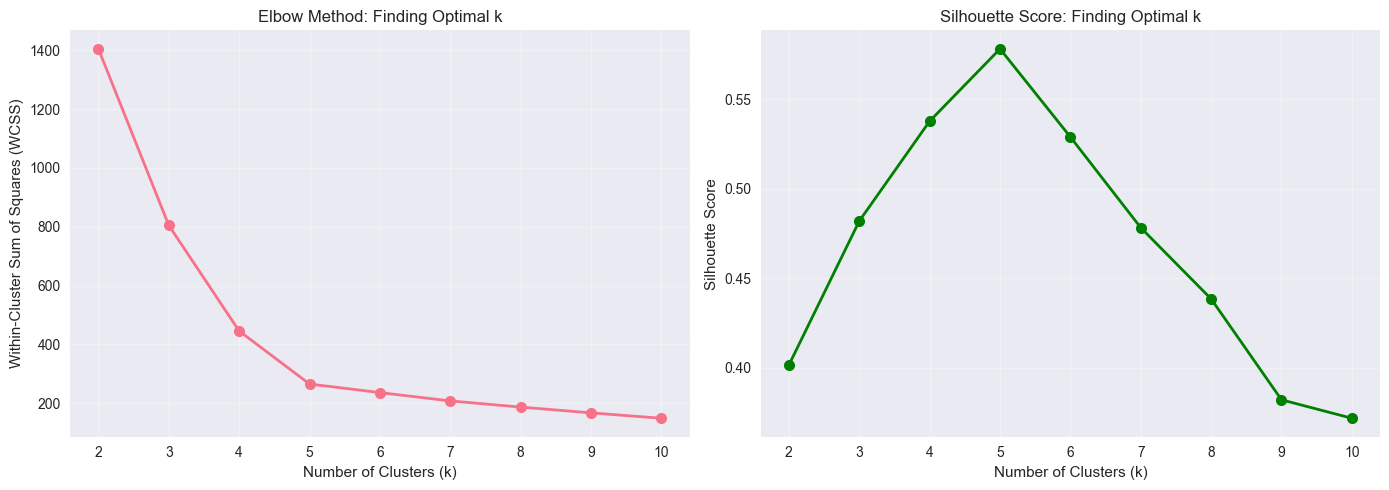


Optimal number of clusters (based on silhouette score): 5
Silhouette scores: {2: 0.401452594829824, 3: 0.4818631524053374, 4: 0.5376342192959117, 5: 0.5780098157133196, 6: 0.5287990621132369, 7: 0.47813500784312035, 8: 0.43835843184166284, 9: 0.3820115377493879, 10: 0.3717018502111502}


In [7]:
# Calculate within-cluster sum of squares (WCSS) for different k values
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = within-cluster sum of squares
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the Elbow Method
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
axes[0].plot(k_range, wcss, marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Within-Cluster Sum of Squares (WCSS)')
axes[0].set_title('Elbow Method: Finding Optimal k')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

# Silhouette score plot
axes[1].plot(k_range, silhouette_scores, marker='o', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score: Finding Optimal k')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)

plt.tight_layout()
plt.show()

# Find optimal k (highest silhouette score)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters (based on silhouette score): {optimal_k}")
print(f"Silhouette scores: {dict(zip(k_range, silhouette_scores))}")


## Step 5: Build the Clustering Model

We'll use K-Means clustering, which groups data points into k clusters by minimizing the distance between points and their cluster centers (centroids).


In [8]:
# Create and fit the K-Means model
# Using optimal_k from elbow method (typically 5 for this dataset)
n_clusters = optimal_k
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get cluster labels for each data point
labels = kmeans.labels_

# Get cluster centers (in scaled space)
centroids_scaled = kmeans.cluster_centers_

# Transform centroids back to original scale for visualization
centroids = scaler.inverse_transform(centroids_scaled)

print(f"Model trained with {n_clusters} clusters!")
print(f"\nCluster centers (original scale):")
for i, center in enumerate(centroids):
    print(f"Cluster {i}: Income={center[0]:.2f}, Spending={center[1]:.2f}")

# Add cluster labels to dataframe
df['cluster'] = labels
print(f"\nCluster distribution:")
print(df['cluster'].value_counts().sort_index())


Model trained with 5 clusters!

Cluster centers (original scale):
Cluster 0: Income=21.59, Spending=30.24
Cluster 1: Income=74.74, Spending=23.80
Cluster 2: Income=24.84, Spending=73.52
Cluster 3: Income=79.54, Spending=79.93
Cluster 4: Income=50.76, Spending=51.56

Cluster distribution:
cluster
0    250
1    243
2    242
3    234
4    231
Name: count, dtype: int64


## Step 6: Visualize the Clusters

Let's create visualizations to see how our clusters look!


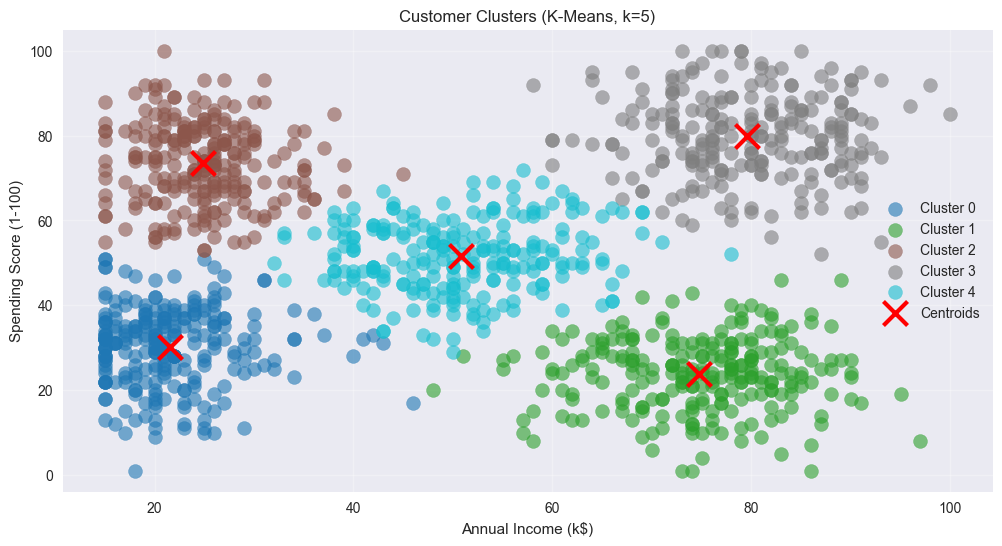

In [9]:
# Create visualization of clusters
plt.figure(figsize=(12, 6))

# Plot clusters
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))
for i in range(n_clusters):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['annual_income'], 
                cluster_data['spending_score'],
                c=[colors[i]], 
                label=f'Cluster {i}',
                alpha=0.6, 
                s=100)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', marker='x', s=300, linewidths=3,
            label='Centroids', zorder=10)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'Customer Clusters (K-Means, k={n_clusters})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Step 7: Evaluate Clustering Performance

For clustering, we use different metrics than supervised learning:
- **Silhouette Score**: Measures how similar a point is to its own cluster vs other clusters (-1 to 1, higher is better)
- **Davies-Bouldin Index**: Average similarity ratio of clusters (lower is better)
- **Inertia (WCSS)**: Sum of squared distances to nearest cluster center (lower is better)


In [10]:
# Calculate evaluation metrics
silhouette = silhouette_score(X_scaled, labels)
davies_bouldin = davies_bouldin_score(X_scaled, labels)
inertia = kmeans.inertia_

print("=" * 50)
print("CLUSTERING PERFORMANCE METRICS")
print("=" * 50)
print(f"Silhouette Score: {silhouette:.4f}")
print(f"  (Range: -1 to 1, higher is better)")
print(f"  (1 = perfect separation, 0 = overlapping, -1 = wrong clusters)")
print(f"\nDavies-Bouldin Index: {davies_bouldin:.4f}")
print(f"  (Lower is better, indicates better separation)")
print(f"\nInertia (WCSS): {inertia:.4f}")
print(f"  (Lower is better, measures compactness of clusters)")


CLUSTERING PERFORMANCE METRICS
Silhouette Score: 0.5780
  (Range: -1 to 1, higher is better)
  (1 = perfect separation, 0 = overlapping, -1 = wrong clusters)

Davies-Bouldin Index: 0.5758
  (Lower is better, indicates better separation)

Inertia (WCSS): 265.4825
  (Lower is better, measures compactness of clusters)


## Step 8: Interpret the Clusters

Let's analyze what each cluster represents in business terms.


In [11]:
# Analyze cluster characteristics
print("=" * 60)
print("CLUSTER ANALYSIS")
print("=" * 60)

for i in range(n_clusters):
    cluster_data = df[df['cluster'] == i]
    print(f"\nCluster {i} ({len(cluster_data)} customers):")
    print(f"  Average Income: ${cluster_data['annual_income'].mean():.2f}k")
    print(f"  Average Spending Score: {cluster_data['spending_score'].mean():.2f}")
    print(f"  Average Age: {cluster_data['age'].mean():.1f} years")
    
    # Interpret cluster
    avg_income = cluster_data['annual_income'].mean()
    avg_spending = cluster_data['spending_score'].mean()
    
    if avg_income < 40 and avg_spending > 50:
        interpretation = "Low income, High spending - Budget-conscious but value quality"
    elif avg_income > 60 and avg_spending > 50:
        interpretation = "High income, High spending - Premium customers"
    elif avg_income > 60 and avg_spending < 50:
        interpretation = "High income, Low spending - Careful spenders"
    elif avg_income < 40 and avg_spending < 50:
        interpretation = "Low income, Low spending - Price-sensitive customers"
    else:
        interpretation = "Moderate income and spending - Average customers"
    
    print(f"  Interpretation: {interpretation}")


CLUSTER ANALYSIS

Cluster 0 (250 customers):
  Average Income: $21.59k
  Average Spending Score: 30.24
  Average Age: 44.5 years
  Interpretation: Low income, Low spending - Price-sensitive customers

Cluster 1 (243 customers):
  Average Income: $74.74k
  Average Spending Score: 23.80
  Average Age: 49.3 years
  Interpretation: High income, Low spending - Careful spenders

Cluster 2 (242 customers):
  Average Income: $24.84k
  Average Spending Score: 73.52
  Average Age: 35.4 years
  Interpretation: Low income, High spending - Budget-conscious but value quality

Cluster 3 (234 customers):
  Average Income: $79.54k
  Average Spending Score: 79.93
  Average Age: 35.3 years
  Interpretation: High income, High spending - Premium customers

Cluster 4 (231 customers):
  Average Income: $50.76k
  Average Spending Score: 51.56
  Average Age: 38.6 years
  Interpretation: Moderate income and spending - Average customers


## Step 9: Visualize Cluster Characteristics

Let's create additional visualizations to understand cluster characteristics better.


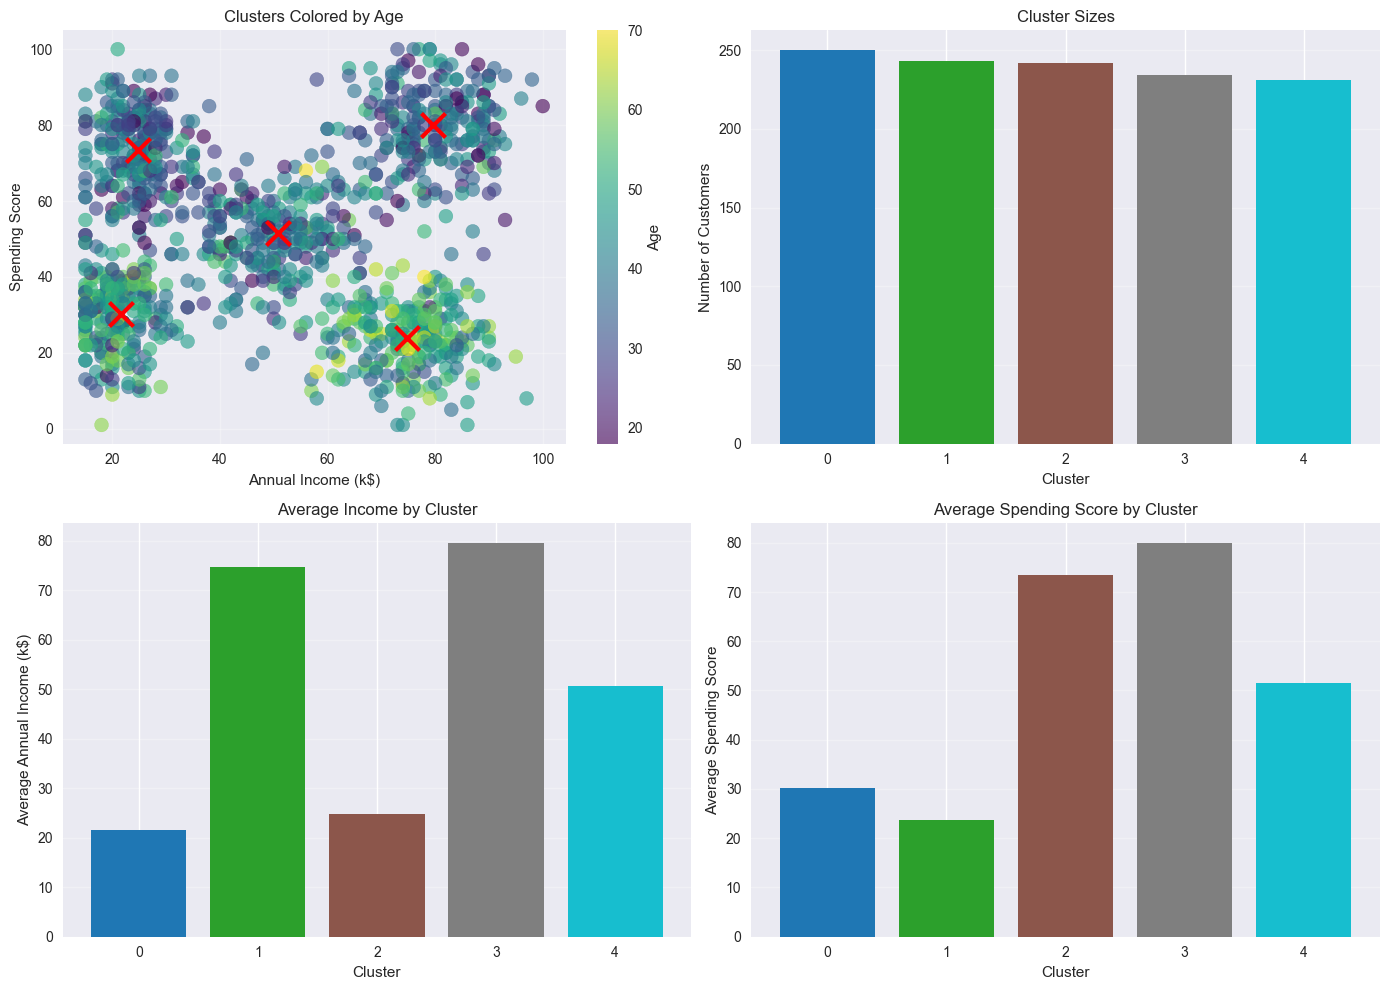

In [12]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Clusters with age color coding
scatter = axes[0, 0].scatter(df['annual_income'], df['spending_score'], 
                            c=df['age'], cmap='viridis', 
                            s=100, alpha=0.6)
axes[0, 0].scatter(centroids[:, 0], centroids[:, 1], 
                  c='red', marker='x', s=300, linewidths=3, zorder=10)
axes[0, 0].set_xlabel('Annual Income (k$)')
axes[0, 0].set_ylabel('Spending Score')
axes[0, 0].set_title('Clusters Colored by Age')
plt.colorbar(scatter, ax=axes[0, 0], label='Age')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Cluster sizes
cluster_counts = df['cluster'].value_counts().sort_index()
axes[0, 1].bar(cluster_counts.index, cluster_counts.values, color=colors[:n_clusters])
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Number of Customers')
axes[0, 1].set_title('Cluster Sizes')
axes[0, 1].set_xticks(cluster_counts.index)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Average income by cluster
avg_income_by_cluster = df.groupby('cluster')['annual_income'].mean()
axes[1, 0].bar(avg_income_by_cluster.index, avg_income_by_cluster.values, 
               color=colors[:n_clusters])
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Annual Income (k$)')
axes[1, 0].set_title('Average Income by Cluster')
axes[1, 0].set_xticks(avg_income_by_cluster.index)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Average spending score by cluster
avg_spending_by_cluster = df.groupby('cluster')['spending_score'].mean()
axes[1, 1].bar(avg_spending_by_cluster.index, avg_spending_by_cluster.values,
               color=colors[:n_clusters])
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Average Spending Score')
axes[1, 1].set_title('Average Spending Score by Cluster')
axes[1, 1].set_xticks(avg_spending_by_cluster.index)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## Step 10: Predict Cluster for New Customers

Let's use our trained model to assign new customers to clusters.


Cluster predictions for new customers:
   annual_income  spending_score  age  predicted_cluster
0             25              80   30                  2
1             75              20   50                  1
2             45              60   35                  4
3             15              40   25                  0


/Users/bassamelkoussa/Downloads/vs_code/hal-mvp/day-3/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


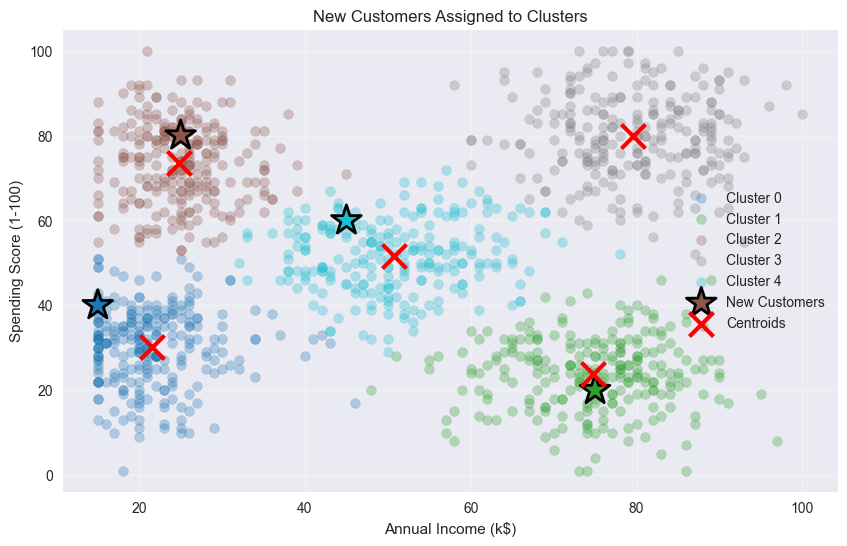

In [13]:
# Create new customer data
new_customers = pd.DataFrame({
    'annual_income': [25, 75, 45, 15],
    'spending_score': [80, 20, 60, 40],
    'age': [30, 50, 35, 25]
})

# Scale the new data
new_customers_scaled = scaler.transform(new_customers[['annual_income', 'spending_score']])

# Predict clusters
new_clusters = kmeans.predict(new_customers_scaled)
new_customers['predicted_cluster'] = new_clusters

print("Cluster predictions for new customers:")
print(new_customers)

# Visualize new customers on the plot
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['annual_income'], 
                cluster_data['spending_score'],
                c=[colors[i]], 
                label=f'Cluster {i}',
                alpha=0.3, 
                s=50)

# Plot new customers
plt.scatter(new_customers['annual_income'], 
            new_customers['spending_score'],
            c=[colors[c] for c in new_clusters],
            marker='*', s=500, edgecolors='black', linewidths=2,
            label='New Customers', zorder=10)

plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', marker='x', s=300, linewidths=3,
            label='Centroids', zorder=10)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('New Customers Assigned to Clusters')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Key Takeaways

1. **Clustering** is unsupervised learning - no labels needed!
2. **K-Means** groups data into k clusters by minimizing distances to centroids
3. **Elbow Method** helps find the optimal number of clusters
4. **Feature Scaling** is crucial for clustering algorithms
5. **Silhouette Score** measures cluster quality (how well-separated clusters are)
6. **Centroids** represent the center of each cluster
7. **Interpretation** of clusters requires domain knowledge and business understanding

## Practice Exercise

1. Try clustering with all three features (income, spending, age). How do the clusters change?
2. Experiment with different values of k (3, 4, 6, 7). Which gives the best silhouette score?
3. Try using only one feature (e.g., just spending_score). What happens?
